In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_ID =merge_df["Mouse ID"].unique()
mice = len(mouse_ID)
mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_removed = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"]) 
duplicate_removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
len(duplicate_removed['Mouse ID'].unique())

249

Summary Statistics:

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = duplicate_removed.groupby("Drug Regimen")

tumor_mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
tumor_med = drug_regimen_df["Tumor Volume (mm3)"].median()
tumor_var = drug_regimen_df["Tumor Volume (mm3)"].var()
tumor_stdev = drug_regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = drug_regimen_df["Tumor Volume (mm3)"].sem()

summary_stat_df = pd.DataFrame({"Tumor Mean": tumor_mean,
                               "Tumor Median": tumor_med,
                               "Tumor Variance": tumor_var,
                               "Tumor Std.Dev.": tumor_stdev,
                               "Tumor Std.eM.": tumor_SEM})


summary_stat_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std.Dev.,Tumor Std.eM.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts:

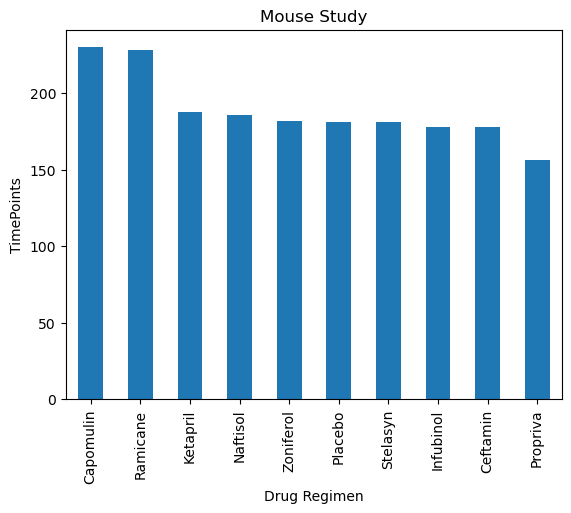

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = duplicate_removed["Drug Regimen"].value_counts()
drug_regimen

drug_regimen.plot(kind = "bar")

plt.title("Mouse Study")
plt.xlabel("Drug Regimen")
plt.ylabel("TimePoints")
plt.show()

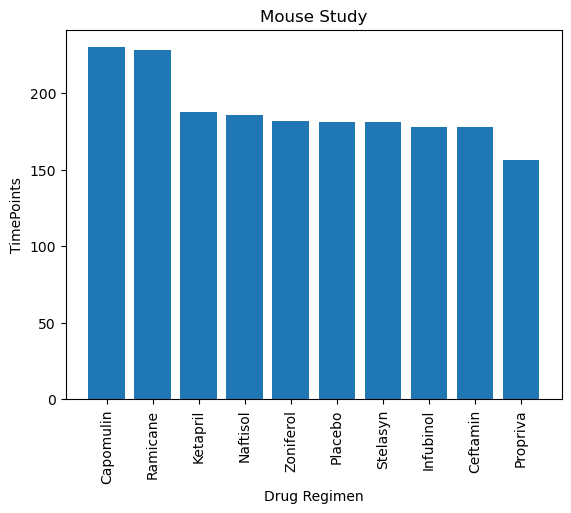

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen.index.values, drug_regimen.values)

plt.title("Mouse Study")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("TimePoints")
plt.show()

Sex
Male      958
Female    930
Name: count, dtype: int64


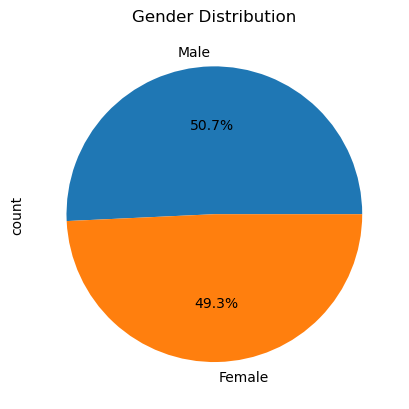

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=duplicate_removed["Sex"].value_counts()
print(gender)

gender.plot(kind="pie", autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

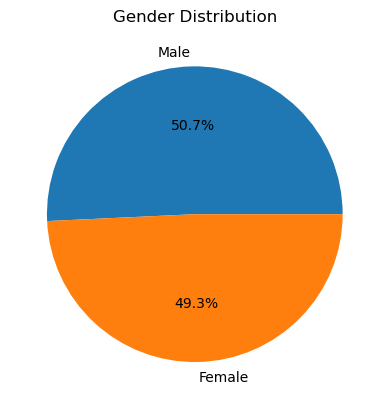

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender.values, labels=gender.index.values, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

Quartiles, Outliers and Boxplots:

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = duplicate_removed.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merge = max_tumor.merge(duplicate_removed,on=['Mouse ID','Timepoint'],how="left")
tumor_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_merge.loc[tumor_merge["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lowerq = tumor_vol.quantile(0.25)
    upperq = tumor_vol.quantile(0.75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outlier: {outliers}")

Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


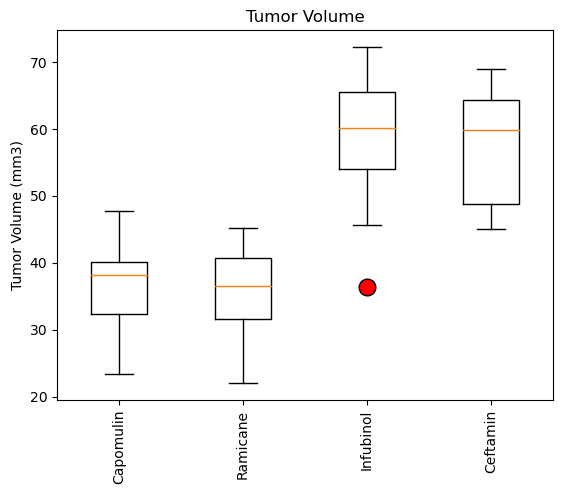

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_list, labels = treatment_list, flierprops=red_out)
plt.title("Tumor Volume")
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=90)
plt.show()

Line and Scatter Plots:

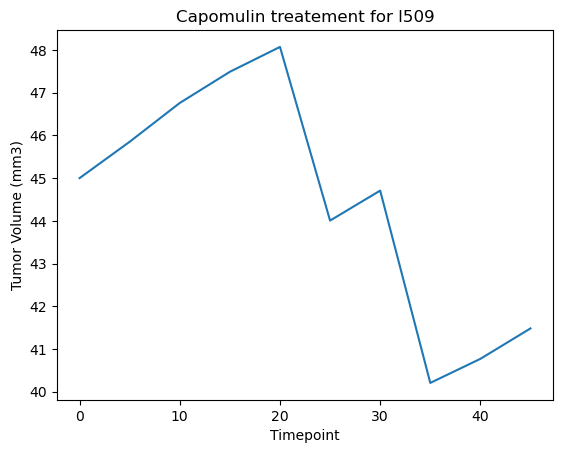

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = duplicate_removed.loc[duplicate_removed['Drug Regimen'] == "Capomulin"]
mouse = capomulin_mice.loc[capomulin_mice['Mouse ID']=='l509']

plt.plot(mouse["Timepoint"], mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatement for l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


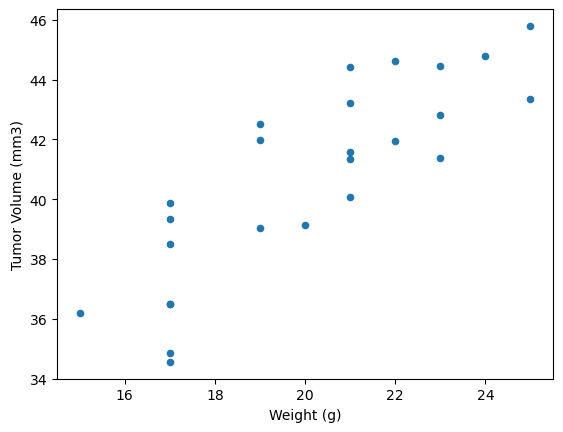

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mean = capomulin_mice.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
cap_mean.plot.scatter('Weight (g)','Tumor Volume (mm3)');

Correlation and Regression

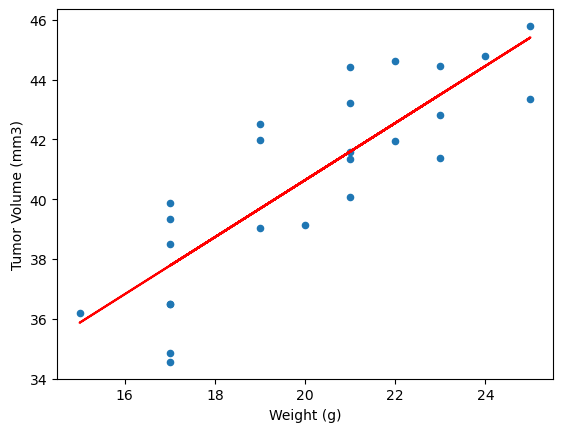

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

ln = linregress(cap_mean)
x = cap_mean['Weight (g)']
y = x*ln.slope + ln.intercept

cap_mean.plot.scatter('Weight (g)','Tumor Volume (mm3)')
plt.plot(x,y,color="red");